<a href="https://colab.research.google.com/github/shailendrajain2892/GA-Classes/blob/master/Capstone_Mahindra_First_Choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Plant data 
**remove duplicate and null columns.**

In [0]:
plant_full_data = pd.read_csv('./drive/My Drive/Colab Notebooks/data/final_csv/plant.csv', index_col=0)

In [4]:
plant_full_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [5]:
plant_full_data.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [6]:
plant_full_data.shape

(438, 13)

**Drop columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization']**

In [0]:
plant = plant_full_data.drop(columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization', 'Customer no. - plant'])

In [8]:
plant.shape

(438, 5)

In [9]:
plant.isnull().sum()

Plant          0
Name 1         0
Postal Code    0
City           0
State          0
dtype: int64

##Read Customer Data. 
**Remove Duplicate and Missing values columns**.

In [10]:
customer_full_data = pd.read_csv('./drive/My Drive/Colab Notebooks/data/final_csv/customer.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
customer_full_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaN
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaN
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaN
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaN
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaN


In [12]:
customer_full_data.shape

(555338, 9)

In [13]:
customer_full_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [0]:
customer = customer_full_data.drop(columns = ['Marital Status', 'Occupation', 'Date of Birth', 'Death date', 'Business Partner'])

In [15]:
customer.dtypes

Customer No.     object
Partner Type    float64
Data Origin      object
Title           float64
dtype: object

In [16]:
customer.isnull().sum()

Customer No.        0
Partner Type       78
Data Origin       136
Title           46307
dtype: int64

**FIll Missing Values in Partner Type, Data Origin, Title columns with most_frequently used values.**

In [0]:
most_frequent_value = customer['Partner Type'].mode()
customer['Partner Type'] = customer['Partner Type'].fillna(most_frequent_value[0])

In [0]:
customer['Data Origin'] = customer['Data Origin'].fillna(customer['Data Origin'].mode()[0])

In [0]:
customer['Title'] = customer['Title'].fillna(customer['Title'].mode()[0])

In [20]:
customer.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

##Load Vehicle Data. 
**Treat missing and nan values.**

In [21]:
vehicles_full_data = pd.read_csv('./drive/My Drive/Colab Notebooks/data/final_csv/vehicles.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
vehicles_full_data.head()

,Vehicle Model,Product GUID,License Plate Number,Fuel Type
0,Z_MAHINDRA,000C2937F0991ED493A0CC3579ED97ED,MH12HN2835,2
1,Z_TATA,000C2937F0991ED493A19620CB69DDA0,TN10AL3462,2
2,Z_MARUTI,000C2937F0991ED493A28DAFBFBA870E,AP28DG9695,1
3,Z_HONDA,000C2937F0991ED493A496B779A143D3,MH15DS9580,1
4,Z_MARUTI,000C2937F0991ED493A58273B92EC2F8,MH14CK0669,2


In [23]:
vehicles_full_data.shape

(588761, 4)

In [24]:
vehicles_full_data.isnull().sum()

Vehicle Model               0
Product GUID                0
License Plate Number     2058
Fuel Type               15627
dtype: int64

***`Remove Product GUID column`***

In [0]:
vehicles = vehicles_full_data.drop(columns='Product GUID')

In [26]:
vehicles.shape

(588761, 3)

In [27]:
vehicles.isnull().sum()

Vehicle Model               0
License Plate Number     2058
Fuel Type               15627
dtype: int64

In [28]:
vehicles.dtypes

Vehicle Model           object
License Plate Number    object
Fuel Type               object
dtype: object

***`Remove vehicles which doesn't have License Plate Number`***

In [0]:
vehicles.dropna(subset=['License Plate Number'], inplace=True)

In [30]:
vehicles.shape

(586703, 3)

In [0]:
vehicles['Fuel Type'] = vehicles['Fuel Type'].fillna(vehicles['Fuel Type'].mode()[0])

In [32]:
vehicles.isnull().sum()

Vehicle Model           0
License Plate Number    0
Fuel Type               0
dtype: int64

## Load Invoice Data
Handle missing, duplicate data

In [33]:
invoice_full_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/final_csv/invoice.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
invoice_full_data.head()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,7.000000e+09,0.00,Running Repairs,0.0,0.00,422000,BC03,NASHIK,NaN,NO,0.0,MH15BN2714,0.0,0.0,0.0,0.0,NaN,0.0,NaN,420.09,0.0,0.0,0.0,0.0,420.09,GOLIVE
1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,0000000017,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.0,LOGAN P,7.000000e+09,0.00,Running Repairs,0.0,0.00,401107,BC01,THANE,NaN,NO,0.0,MH04DN6210,0.0,0.0,0.0,0.0,NaN,0.0,NaN,179.75,0.0,0.0,0.0,0.0,179.75,GOLIVE
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Hyderabad,NaN,NaN,Retail,0000000007,Andhra Pradesh,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,7.000000e+09,0.00,Paid Service,0.0,0.00,500038,BC04,BALANAGAR,NaN,NO,0.0,AP11AB0153,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1340.37,0.0,0.0,0.0,0.0,1340.37,GOLIVE
3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Hyderabad,NaN,NaN,Retail,E22364,Andhra Pradesh,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,7.000000e+09,480.02,Paid Service,0.0,3317.37,500023,BC04,BALANAGAR,NaN,NO,0.0,AP9BJ4847,0.0,0.0,0.0,0.0,NaN,0.0,4302339,5506.45,0.0,0.0,0.0,0.0,5506.45,GOLIVE
4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Hyderabad,NaN,NaN,Retail,E25218,Andhra Pradesh,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.0,INDICA,7.000000e+09,0.00,Accidental,0.0,3105.67,500045,BC04,BALANAGAR,NaN,NO,0.0,AP29BB4586,0.0,0.0,0.0,0.0,NaN,0.0,4302337,5180.55,0.0,0.0,0.0,0.0,5180.55,GOLIVE


In [35]:
invoice_full_data.shape

(984741, 58)

In [36]:
invoice_full_data[invoice_full_data['Customer No.']=='E14006']

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,7.000000e+09,0.0,Running Repairs,0.0,0.00,422000,BC03,NASHIK,NaN,NO,0.0,MH15BN2714,0.0,0.0,0.0,0.0,NaN,0.0,NaN,420.09,0.0,0.0,0.0,0.0,420.09,GOLIVE
16267,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2012-12-05,7000016665,17:53:56,16545,2012-12-05,10:45:16,89165,779.09,HYUNDAI,0.0,SANTRO,7.000017e+09,0.0,Paid Service,0.0,858.34,422000,BC03,NASHIK,NaN,NO,0.0,MH15BN2714,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1637.43,0.0,0.0,0.0,0.0,1637.43,BC03SA3
109394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,NaN,0.0,Paid Service,NaN,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,NaN,NO,0.0,MH15EB5067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619.67,NaN,NaN,NaN,NaN,NaN,X073SA1
422583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2017-07-26,7164602068,12:07:36,809011,2017-07-26,11:01:16,36165,3.46,HONDA,0.0,CITY,NaN,0.0,Running Repairs,NaN,0.00,422000,X073,X073- KRITI AUTOMOBILE REPAIR,NaN,NO,0.0,MH15EB5067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.46,NaN,NaN,NaN,NaN,NaN,X073SA1
36482,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2014-05-13,7000113010,10:18:16,113877,2014-05-12,10:09:53,104111,1539.84,HYUNDAI,0.0,SANTRO,7.000113e+09,0.0,Paid Service,0.0,1685.14,422000,BC03,NASHIK,NaN,NO,0.0,MH15BN2714,0.0,0.0,0.0,0.0,NaN,0.0,VILAS,3224.98,0.0,0.0,0.0,0.0,3224.98,BC03SA2
24089,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2013-07-31,7000043586,17:27:04,43294,2013-07-30,10:38:55,99320,463.05,HYUNDAI,0.0,SANTRO,7.000044e+09,0.0,Paid Service,0.0,1340.22,422000,BC03,NASHIK,NaN,NO,0.0,MH15BN2714,0.0,0.0,0.0,0.0,NaN,0.0,CX,1803.27,0.0,0.0,0.0,0.0,1803.27,BC03SA3


In [0]:
columns_to_be_removed = invoice_full_data.isnull().sum()[invoice_full_data.isnull().sum().sort_values() > 29178].index

In [0]:
invoice = invoice_full_data.drop(columns=columns_to_be_removed)

In [39]:
invoice.shape

(984741, 28)

In [40]:
invoice.head(5)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,NaN,Nashik,Retail,E14006,Maharashtra,00:00:00,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,0.00,Running Repairs,0.00,422000,BC03,NASHIK,NO,0.0,MH15BN2714,420.09,GOLIVE
1,NaN,THANE,Retail,0000000017,Maharashtra,00:00:00,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.0,LOGAN P,0.00,Running Repairs,0.00,401107,BC01,THANE,NO,0.0,MH04DN6210,179.75,GOLIVE
2,NaN,Hyderabad,Retail,0000000007,Andhra Pradesh,00:00:00,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.0,AP11AB0153,1340.37,GOLIVE
3,NaN,Hyderabad,Retail,E22364,Andhra Pradesh,00:00:00,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.0,SCORPIO CRDE,480.02,Paid Service,3317.37,500023,BC04,BALANAGAR,NO,0.0,AP9BJ4847,5506.45,GOLIVE
4,NaN,Hyderabad,Retail,E25218,Andhra Pradesh,00:00:00,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.0,INDICA,0.00,Accidental,3105.67,500045,BC04,BALANAGAR,NO,0.0,AP29BB4586,5180.55,GOLIVE


In [0]:
columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp']

In [0]:
invoice = invoice.drop(columns=columns_irrelevant)

In [0]:
invoice.dropna(subset=['Regn No'], inplace=True)

In [44]:
invoice.isnull().sum().sort_values()

Labour Total             0
Regn No                  0
Plant Name1              0
Plant                    0
Pin code                 0
Parts Total              0
Order Type               0
OSL Total                0
Misc Total               0
Make                     0
Total Amt Wtd Tax.       0
User ID                  0
JobCard Time             0
JobCard Date             0
Job Card No              0
Invoice Time             0
Invoice No               0
Invoice Date             0
District                 0
Customer No.             0
KMs Reading              0
Cust Type                4
CITY                     4
Model                 1524
dtype: int64

In [0]:
invoice['Cust Type'] = invoice['Cust Type'].fillna(invoice['Cust Type'].mode()[0])
invoice['CITY'] = invoice['CITY'].fillna(invoice['CITY'].mode()[0])
invoice['Model']  = invoice['Model'].fillna(invoice['Model'].mode()[0])

In [46]:
invoice.isnull().sum().sort_values()

CITY                  0
Regn No               0
Plant Name1           0
Plant                 0
Pin code              0
Parts Total           0
Order Type            0
OSL Total             0
Model                 0
Misc Total            0
Make                  0
Labour Total          0
KMs Reading           0
JobCard Time          0
JobCard Date          0
Job Card No           0
Invoice Time          0
Invoice No            0
Invoice Date          0
District              0
Customer No.          0
Cust Type             0
Total Amt Wtd Tax.    0
User ID               0
dtype: int64

In [47]:
invoice['Order Type'].value_counts()

Running Repairs      551850
Paid Service         291507
Accidental            88396
SMC Redemption        20038
Mechanical            15100
SMC Value Package     14091
Repeat Order           3473
WBW Order               252
Workshop Damage          18
Name: Order Type, dtype: int64

## Read JTD data
* Handle missing and duplicate data.

In [48]:
jtd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/final_csv/jtd.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [49]:
jtd.shape

(5619484, 9)

In [50]:
jtd[jtd['DBM Order']==98050]

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,98050,10,1EMJ96615412,NaN,SWITCH A-A/C CONTROL,P002,1.0,EA,5185.92
1,98050,20,1EMJ96548238,NaN,WEATHER STRIP A-REAR DOOR LH,P002,1.0,EA,1433.49
2,98050,30,1EMJ96548102,NaN,WEATHER STRIP A-FRONT DOOR LH,P002,1.0,EA,1526.88
3,98050,40,1EMJ96548239,NaN,WEATHER STRIP A-REAR DOOR RH,P002,1.0,EA,1433.49
4,98050,50,1EMJ96548103,NaN,WEATHER STRIP A-FRONT DOOR RH,P002,1.0,EA,1526.88


In [51]:
len(jtd['Order Quantity'].unique())

3604

In [52]:
aggregation_jtd_dbno={ 'Description' : {'Description' : lambda x: str(set(x)).strip('{}').replace("'","")},
                      'Item Category' : {'Item Category' : lambda x: str(set(x)).strip('{}').replace("'","")}, 
                      'Order Quantity' : {'Order Quantity' : 'sum'},
                      'Net value' : {'Net value' : 'sum'} }
jtd_grouped = jtd.groupby('DBM Order')['Description','Item Category','Order Quantity','Net value'].agg(aggregation_jtd_dbno).reset_index()

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [53]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"FILTER-OIL, TIMING BELT, MISC_OTHER CHARGES, T...","P011, P002, P010, P001",731.6,16998.49
1,5,"CLEAFUEL FILTER, BULB 60/55W,12V,P43T, Paid Se...","P002, P001",290.2,3779.80
2,6,"Paid Service-Minor, MISC LABOR 0.5 HOURS, REPL...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"OIL FILTER, AIR FILTER, REPLACE ENGINE OIL & O...","P002, P001",69.0,2306.94


In [54]:
jtd_grouped.shape

(973473, 5)

In [55]:
jtd['Description'].value_counts().head(50)

MISC_OTHER CHARGES                        270563
Paid Service-Minor                        201857
WASHING                                   199068
Wheel Alignment                           191211
OIL FILTER                                154387
URANIA SUPREMO CI 4 15W 40                122218
MFC PROLEUM CI4/SL 15W40                   92091
AIR FILTER                                 80211
Wheel Balancing (5 Wheels)                 79970
MISC LABOR 0.5 HOURS                       62982
General Check up                           62459
Paid Service-Major                         60369
WINDSHIELD LIQUID WASHER                   55352
MISC LABOR 0.25 HOURS                      50143
DISTILLED WATER                            46919
Interior & Upholstery Cleaning             44864
REPLACE BRAKE PAD (BOTH SIDE)              38552
PAINTING CHARGES                           34187
MISC LABOR 1 HOUR                          33993
BALANCE WEIGHT 15GRAM                      31791
MISC LABOR 2 HOURS  

In [56]:
jtd.shape

(5619484, 9)

In [57]:
jtd.isnull().sum().sort_values()

DBM Order                    0
Order Item                   0
Item Category                0
Order Quantity               0
Net value                    0
Material                 51629
Description              51629
Target quantity UoM      51629
Labor Value Number     3774033
dtype: int64

## Merge the Data
**Merge Invoice and Customer Data on Customer No. Key**

In [0]:
invoice['Customer No.'] = invoice['Customer No.'].str.lstrip('0')

In [0]:
customer['Customer No.'] = customer['Customer No.'].astype(str)

In [0]:
invoice_customer = pd.merge(invoice, customer, on='Customer No.')

In [61]:
invoice_customer.shape, len(invoice['Customer No.'].unique()), len(customer['Customer No.'].unique()), len(invoice_customer['Customer No.'].unique())

((981217, 27), 502770, 555338, 502480)

In [62]:
invoice_customer.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
District              0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
Partner Type          0
Data Origin           0
Title                 0
dtype: int64

**Merge Vehicle and Invoice Customer df based on Registration number and License plat number**

In [63]:
invoice_customer.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Regn No,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title
0,Nashik,Retail,E14006,Maharashtra,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.0,SANTRO,0.0,Running Repairs,0.00,422000,BC03,NASHIK,MH15BN2714,420.09,GOLIVE,1.0,Z001,2.0
1,Nashik,Retail,E14006,Maharashtra,2012-12-05,7000016665,17:53:56,16545,2012-12-05,10:45:16,89165,779.09,HYUNDAI,0.0,SANTRO,0.0,Paid Service,858.34,422000,BC03,NASHIK,MH15BN2714,1637.43,BC03SA3,1.0,Z001,2.0
2,Nashik,Retail,E14006,Maharashtra,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,0.0,Paid Service,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,MH15EB5067,619.67,X073SA1,1.0,Z001,2.0
3,Nashik,Retail,E14006,Maharashtra,2017-07-26,7164602068,12:07:36,809011,2017-07-26,11:01:16,36165,3.46,HONDA,0.0,CITY,0.0,Running Repairs,0.00,422000,X073,X073- KRITI AUTOMOBILE REPAIR,MH15EB5067,3.46,X073SA1,1.0,Z001,2.0
4,Nashik,Retail,E14006,Maharashtra,2014-05-13,7000113010,10:18:16,113877,2014-05-12,10:09:53,104111,1539.84,HYUNDAI,0.0,SANTRO,0.0,Paid Service,1685.14,422000,BC03,NASHIK,MH15BN2714,3224.98,BC03SA2,1.0,Z001,2.0


In [0]:
invoice_customer['Regn No'] = invoice_customer['Regn No'].astype(str)

In [0]:
vehicles['License Plate Number'] = vehicles['License Plate Number'].astype(str)

In [66]:
vehicles['License Plate Number'].unique()

array(['MH12HN2835', 'TN10AL3462', 'AP28DG9695', ..., 'KA09Z6087',
       'TN30K7112', 'KA09MB290'], dtype=object)

In [67]:
invoice_customer.shape

(981217, 27)

In [0]:
invoice_customer_vehicles = pd.merge(invoice_customer, vehicles, left_on='Regn No', right_on='License Plate Number')

In [0]:
invoice_customer_vehicles.drop(columns='Regn No', inplace=True)

In [70]:
vehicles.isnull().sum()

Vehicle Model           0
License Plate Number    0
Fuel Type               0
dtype: int64

In [71]:
invoice_customer_vehicles.isnull().sum()

CITY                    0
Cust Type               0
Customer No.            0
District                0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Total Amt Wtd Tax.      0
User ID                 0
Partner Type            0
Data Origin             0
Title                   0
Vehicle Model           0
License Plate Number    0
Fuel Type               0
dtype: int64

In [72]:
invoice_customer_vehicles.shape

(984165, 29)

**Merge invoice_customer_vehicles and Plant**

In [73]:
plant.shape

(438, 5)

In [74]:
len(invoice_customer_vehicles.Plant.unique()), len(plant.Plant.unique())

(431, 438)

In [0]:
invoice_customer_vehicles_plant = pd.merge(invoice_customer_vehicles, plant, on='Plant')

In [76]:
invoice_customer_vehicles_plant.shape

(743801, 33)

In [77]:
invoice_customer_vehicles_plant.isnull().sum()

CITY                    0
Cust Type               0
Customer No.            0
District                0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Total Amt Wtd Tax.      0
User ID                 0
Partner Type            0
Data Origin             0
Title                   0
Vehicle Model           0
License Plate Number    0
Fuel Type               0
Name 1                  0
Postal Code             0
City                    0
State                   0
dtype: int64

## Prepare Data for Clustering after cleaning merged data

In [78]:
invoice_customer_vehicles_plant.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title,Vehicle Model,License Plate Number,Fuel Type,Name 1,Postal Code,City,State
0,Nashik,Retail,E14006,Maharashtra,2017-04-14,7164601412,15:29:52,674656,2017-04-13,17:09:17,35165,579.13,HONDA,0.0,CITY,0.0,Paid Service,40.54,422000,X073,X073- KRITI AUTOMOBILE REPAIR,619.67,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
1,Nashik,Retail,E14006,Maharashtra,2017-07-26,7164602068,12:07:36,809011,2017-07-26,11:01:16,36165,3.46,HONDA,0.0,CITY,0.0,Running Repairs,0.00,422000,X073,X073- KRITI AUTOMOBILE REPAIR,3.46,X073SA1,1.0,Z001,2.0,Z_HONDA,MH15EB5067,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
2,Nashik,Retail,E27136,Maharashtra,2017-08-16,7164602334,18:49:05,836012,2017-08-16,16:16:12,89944,3.46,MARUTI SUZUKI,0.0,WAGONR,0.0,Paid Service,0.00,422009,X073,X073- KRITI AUTOMOBILE REPAIR,3.46,X073SA1,1.0,Z001,2.0,Z_MARUTI,MH04BK0425,2,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
3,Pune,Retail,E26786,Maharashtra,2017-03-18,7164601170,14:46:31,626932,2017-03-04,11:41:33,30796,150.48,MARUTI SUZUKI,0.0,WAGONR,0.0,Running Repairs,0.00,411056,X073,X073- KRITI AUTOMOBILE REPAIR,150.48,X073SA1,1.0,Z001,2.0,Z_MARUTI,MH15EB6209,1,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra
4,NASIK,Retail,131,Maharashtra,2016-12-31,7164600695,11:55:07,554552,2016-12-28,16:50:13,177260,1519.08,MARUTI SUZUKI,0.0,ALTO,0.0,Paid Service,889.92,422000,X073,X073- KRITI AUTOMOBILE REPAIR,2409.00,X073SA1,1.0,Z005,2.0,Z_MARUTI,MH15BD6287,1,X073- KRITI AUTOMOBILE REPAIR,422007,Nashik,Maharashtra


In [0]:
invoice_customer_vehicles_plant['Fuel Type'] = invoice_customer_vehicles_plant['Fuel Type'].astype(int)

In [80]:
(invoice_customer_vehicles_plant['Fuel Type'].value_counts()/len(invoice_customer_vehicles_plant['Fuel Type']))*100

2    63.509460
1    33.995787
3     1.524198
4     0.968135
5     0.002420
Name: Fuel Type, dtype: float64

In [81]:
invoice_customer_vehicles_plant.shape

(743801, 33)

In [82]:
invoice_customer_vehicles_plant.describe()

,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Total Amt Wtd Tax.,Partner Type,Title,Fuel Type,Postal Code
count,7.438010e+05,7.438010e+05,7.438010e+05,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000,743801.000000
mean,7.183450e+09,6.098939e+05,8.416413e+04,1530.608330,291.219836,76.105915,2218.535148,471388.503781,4116.469230,1.231200,1.952764,1.694719,478618.281046
std,4.735438e+07,2.304533e+05,1.430325e+05,4828.993265,2435.280185,1055.780333,7810.100921,187263.159601,11360.422771,45.491633,0.212143,0.548587,179724.614738
min,7.000000e+09,1.190000e+02,1.000000e+00,-164.950000,-0.060000,0.000000,-2343.200000,0.000000,-2342.200000,1.000000,1.000000,1.000000,121006.000000
25%,7.159801e+09,4.254400e+05,3.606100e+04,0.010000,0.000000,0.000000,0.000000,333026.000000,221.560000,1.000000,2.000000,1.000000,342001.000000
50%,7.179401e+09,6.160930e+05,6.439100e+04,349.960000,0.000000,0.000000,148.390000,485001.000000,1105.200000,1.000000,2.000000,2.000000,500050.000000
75%,7.214001e+09,8.056700e+05,1.005160e+05,1244.250000,0.000000,0.000000,1981.000000,608001.000000,3925.150000,1.000000,2.000000,2.000000,608001.000000
max,7.309000e+09,1.001292e+06,9.999999e+06,434000.000000,355200.060000,99974.800000,640296.060000,999999.000000,720296.070000,9003.000000,2.000000,5.000000,999999.000000


In [83]:
invoice_customer_vehicles_plant.shape, invoice_customer_vehicles_plant.columns

((743801, 33),
 Index(['CITY', 'Cust Type', 'Customer No.', 'District', 'Invoice Date',
        'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
        'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
        'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
        'Plant Name1', 'Total Amt Wtd Tax.', 'User ID', 'Partner Type',
        'Data Origin', 'Title', 'Vehicle Model', 'License Plate Number',
        'Fuel Type', 'Name 1', 'Postal Code', 'City', 'State'],
       dtype='object'))

In [0]:
invoice_customer_vehicles_plant['Invoice Date'] = pd.to_datetime(invoice_customer_vehicles_plant['Invoice Date'])

In [0]:
invoice_customer_vehicles_plant['Invoice Date Time'] = invoice_customer_vehicles_plant['Invoice Date'].astype(str).str.cat(invoice_customer_vehicles_plant[['Invoice Time']].astype(str),sep=' ')

In [0]:
invoice_customer_vehicles_plant['JobCard Date'] =  pd.to_datetime(invoice_customer_vehicles_plant['JobCard Date'])

In [0]:
invoice_customer_vehicles_plant['JobCard Date Time'] = invoice_customer_vehicles_plant['JobCard Date'].astype(str).str.cat(invoice_customer_vehicles_plant[['JobCard Time']].astype(str), sep=' ')

In [88]:
invoice_customer_vehicles_plant.loc[:, ['JobCard Date Time', 'JobCard Date','JobCard Time']].head()

,JobCard Date Time,JobCard Date,JobCard Time
0,2017-04-13 17:09:17,2017-04-13,17:09:17
1,2017-07-26 11:01:16,2017-07-26,11:01:16
2,2017-08-16 16:16:12,2017-08-16,16:16:12
3,2017-03-04 11:41:33,2017-03-04,11:41:33
4,2016-12-28 16:50:13,2016-12-28,16:50:13


In [89]:
invoice_customer_vehicles_plant.loc[:, ['Invoice Date Time', 'Invoice Date','Invoice Time']].head()

,Invoice Date Time,Invoice Date,Invoice Time
0,2017-04-14 15:29:52,2017-04-14,15:29:52
1,2017-07-26 12:07:36,2017-07-26,12:07:36
2,2017-08-16 18:49:05,2017-08-16,18:49:05
3,2017-03-18 14:46:31,2017-03-18,14:46:31
4,2016-12-31 11:55:07,2016-12-31,11:55:07


In [0]:
invoice_customer_vehicles_plant['Invoice Date Time'] = pd.to_datetime(invoice_customer_vehicles_plant['Invoice Date Time'])

In [0]:
invoice_customer_vehicles_plant['JobCard Date Time'] = pd.to_datetime(invoice_customer_vehicles_plant['JobCard Date Time'])

In [0]:
invoice_customer_vehicles_plant['ServiceTime'] = invoice_customer_vehicles_plant['Invoice Date Time']-invoice_customer_vehicles_plant['JobCard Date Time']

In [93]:
invoice_customer_vehicles_plant.loc[:, ['ServiceTime']].head()

,ServiceTime
0,0 days 22:20:35
1,0 days 01:06:20
2,0 days 02:32:53
3,14 days 03:04:58
4,2 days 19:04:54


In [94]:
invoice_customer_vehicles_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,743801
mean,4 days 14:12:20.529961
std,14 days 09:21:48.693044
min,-1 days +23:59:27
25%,0 days 01:34:17
50%,0 days 06:54:15
75%,3 days 01:07:20
max,650 days 01:10:26


In [0]:
invoice_customer_vehicles_plant = invoice_customer_vehicles_plant.loc[invoice_customer_vehicles_plant['ServiceTime']>pd.Timedelta(hours=0),:]

In [96]:
invoice_customer_vehicles_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,743800
mean,4 days 14:12:21.063402
std,14 days 09:21:49.443709
min,0 days 00:00:36
25%,0 days 01:34:17
50%,0 days 06:54:15
75%,3 days 01:07:20.250000
max,650 days 01:10:26


In [0]:
invoice_customer_vehicles_plant['ServiceTime_category']=None
invoice_customer_vehicles_plant.loc[invoice_customer_vehicles_plant['ServiceTime']<pd.Timedelta(hours=13),'ServiceTime_category']='super_fast'
invoice_customer_vehicles_plant.loc[(invoice_customer_vehicles_plant['ServiceTime']>=pd.Timedelta(hours=13))&(invoice_customer_vehicles_plant['ServiceTime']<pd.Timedelta(hours=36)),'ServiceTime_category']='fast'
invoice_customer_vehicles_plant.loc[(invoice_customer_vehicles_plant['ServiceTime']>=pd.Timedelta(hours=36))&(invoice_customer_vehicles_plant['ServiceTime']<pd.Timedelta(hours=61)),'ServiceTime_category']='mid'
invoice_customer_vehicles_plant.loc[(invoice_customer_vehicles_plant['ServiceTime']>=pd.Timedelta(hours=61))&(invoice_customer_vehicles_plant['ServiceTime']<pd.Timedelta(hours=84)),'ServiceTime_category']='slow'
invoice_customer_vehicles_plant.loc[invoice_customer_vehicles_plant['ServiceTime']>=pd.Timedelta(hours=84),'ServiceTime_category']='super_slow'

In [0]:
invoice_customer_vehicles_plant.drop(columns=['Invoice Time', 'Invoice Date', 'Invoice No', 'JobCard Date', 'JobCard Time', 'KMs Reading', 'Make', 'Model', 'Pin code', 'Plant', 'Plant Name1', 'User ID', 'District', 'License Plate Number', 'Name 1', 'Postal Code', 'CITY', 'State', 'Invoice Date Time', 'JobCard Date Time', 'ServiceTime'], inplace=True)

In [99]:
invoice_customer_vehicles_plant.head()

,Cust Type,Customer No.,Job Card No,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,ServiceTime_category
0,Retail,E14006,674656,579.13,0.0,0.0,Paid Service,40.54,619.67,1.0,Z001,2.0,Z_HONDA,2,Nashik,fast
1,Retail,E14006,809011,3.46,0.0,0.0,Running Repairs,0.00,3.46,1.0,Z001,2.0,Z_HONDA,2,Nashik,super_fast
2,Retail,E27136,836012,3.46,0.0,0.0,Paid Service,0.00,3.46,1.0,Z001,2.0,Z_MARUTI,2,Nashik,super_fast
3,Retail,E26786,626932,150.48,0.0,0.0,Running Repairs,0.00,150.48,1.0,Z001,2.0,Z_MARUTI,1,Nashik,super_slow
4,Retail,131,554552,1519.08,0.0,0.0,Paid Service,889.92,2409.00,1.0,Z005,2.0,Z_MARUTI,1,Nashik,slow


**Merge Jtd grouped and invoice_customer_vehicles_plant csv**

In [100]:
len(invoice_customer_vehicles_plant['Job Card No'].unique()), len(jtd_grouped['DBM Order'].unique())

(735685, 973473)

In [0]:
invoice_customer_vehicles_plant_jtd = pd.merge(invoice_customer_vehicles_plant, jtd_grouped, left_on='Job Card No', right_on='DBM Order').drop('DBM Order', axis=1)

In [102]:
invoice_customer_vehicles_plant_jtd.shape

(743689, 20)

In [103]:
invoice_customer_vehicles_plant_jtd.head(1)

,Cust Type,Customer No.,Job Card No,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,Retail,E14006,674656,579.13,0.0,0.0,Paid Service,40.54,619.67,1.0,Z001,2.0,Z_HONDA,2,Nashik,fast,"Wheel Alignment, MISC LABOR 0.5 HOURS, BALANCE...","P002, P001",33.0,619.67


In [0]:
aggregation_by_customer_no = {'Cust Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Labour Total':'sum',
                              'Misc Total':'sum',
                              'OSL Total':'sum',
                              'Order Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Parts Total' : 'sum',
                              'Total Amt Wtd Tax.' : 'sum',
                              'Partner Type': 'nunique',
                              'Data Origin' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Title' : 'nunique',
                              'Vehicle Model': lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Fuel Type' : 'nunique',
                              'City' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'ServiceTime_category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Description' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Item Category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Order Quantity' : 'sum',
                              'Net value' : 'sum'}

In [0]:
invoice_grouped_data = invoice_customer_vehicles_plant_jtd.groupby('Customer No.').agg(aggregation_by_customer_no).reset_index()

In [106]:
invoice_grouped_data.shape

(406838, 19)

In [107]:
invoice_grouped_data.head(1)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,100001,Retail,3429.34,0.0,0.0,"Accidental, Running Repairs",834.41,4263.75,1,Z005,1,"Z_SKODA, Z_TOYOTA, Z_MAHINDRA",2,Pune,"mid, super_slow, super_fast","""WIPER BLADE 508 mm / 20"", TIE CLIP, PETRONAS ...","P002, P001, P001",1208.2,4263.75


In [108]:
','.join(sorted([w.strip(' ') for w in invoice_grouped_data['Order Type'].iloc[50].split(',')]))


'Accidental,Paid Service,Running Repairs'

In [0]:
invoice_grouped_data['Order Type'] = invoice_grouped_data['Order Type'].apply(lambda x: ','.join(sorted([w.strip(' ') for w in x.split(',')])))

In [0]:
freq_used_services = ['Running Repairs','Paid Service', 'Paid Service,Running Repairs', 'Accidental']

In [0]:
invoice_grouped_data['Order Type'] = invoice_grouped_data['Order Type'].apply(lambda order: 'Others' if order not in freq_used_services else order)

In [112]:
(invoice_grouped_data['Order Type'].value_counts()/len(invoice_grouped_data['Order Type']))*100

Running Repairs                 45.934500
Paid Service                    24.773743
Paid Service,Running Repairs    12.827710
Others                          10.757845
Accidental                       5.706202
Name: Order Type, dtype: float64

In [0]:
most_freq_data_origin = (invoice_grouped_data['Data Origin'].value_counts()/len(invoice_grouped_data['Data Origin'])).iloc[0:7].index

In [0]:
invoice_grouped_data['Data Origin'] = invoice_grouped_data['Data Origin'].apply(lambda x: 'Others' if x not in most_freq_data_origin else x)

In [115]:
(invoice_grouped_data['Data Origin'].value_counts()/len(invoice_grouped_data['Data Origin']))*100

Z005      28.169689
Z006      24.485913
Others    14.111022
Z001       8.555494
Z004       7.042607
Z002       6.759447
Z019       5.761507
Z021       5.114321
Name: Data Origin, dtype: float64

In [0]:
most_freq_used_veh_models = ((invoice_grouped_data['Vehicle Model'].value_counts()/len(invoice_grouped_data['Vehicle Model']))*100)[((invoice_grouped_data['Vehicle Model'].value_counts()/len(invoice_grouped_data['Vehicle Model']))*100)>2].index

In [0]:
invoice_grouped_data['Vehicle Model'] = invoice_grouped_data['Vehicle Model'].apply(lambda x: 'Others' if x not in most_freq_used_veh_models else x)

In [118]:
invoice_grouped_data['Vehicle Model'].value_counts()/len(invoice_grouped_data['Vehicle Model'])*100

Z_MARUTI            32.637807
Z_MAHINDRA          17.944243
Z_HYUNDAI           14.480457
Z_TATA              10.542526
Others               8.341650
Z_GENERAL MOTORS     4.866065
Z_TOYOTA             4.320147
Z_FORD               3.966935
Z_HONDA              2.900172
Name: Vehicle Model, dtype: float64

In [0]:
most_freq_service_type = ((invoice_grouped_data['ServiceTime_category'].value_counts()/len(invoice_grouped_data['ServiceTime_category']))*100).iloc[0:11]

In [0]:
invoice_grouped_data['ServiceTime_category'] = invoice_grouped_data['ServiceTime_category'].apply(lambda x: 'Others' if x not in most_freq_service_type else x )

In [121]:
((invoice_grouped_data['ServiceTime_category'].value_counts()/len(invoice_grouped_data['ServiceTime_category']))*100)

super_fast                      43.779342
super_slow                      16.563350
fast                             8.233744
Others                           7.584591
super_slow, super_fast           6.303000
mid                              4.304908
fast, super_fast                 4.282540
slow                             2.694439
mid, super_fast                  1.909605
fast, super_slow, super_fast     1.841519
fast, super_slow                 1.551477
mid, super_slow                  0.951484
Name: ServiceTime_category, dtype: float64

In [122]:
invoice_grouped_data.head(1)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,100001,Retail,3429.34,0.0,0.0,Others,834.41,4263.75,1,Z005,1,Others,2,Pune,Others,"""WIPER BLADE 508 mm / 20"", TIE CLIP, PETRONAS ...","P002, P001, P001",1208.2,4263.75


In [0]:
invoice_grouped_data.drop(columns=['Description'], inplace=True)

In [0]:
most_freq_used_item_categ = ((invoice_grouped_data['Item Category'].value_counts()/len(invoice_grouped_data['Item Category']))*100).iloc[0:11].index

In [0]:
invoice_grouped_data['Item Category'] = invoice_grouped_data['Item Category'].apply(lambda x: 'Others' if x not in most_freq_used_item_categ else x)

In [126]:
invoice_grouped_data.head(1)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Vehicle Model,Fuel Type,City,ServiceTime_category,Item Category,Order Quantity,Net value
0,100001,Retail,3429.34,0.0,0.0,Others,834.41,4263.75,1,Z005,1,Others,2,Pune,Others,"P002, P001, P001",1208.2,4263.75


**Apply Label Encoding on cluster data**

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
invoice_grouped_data_categroical = invoice_grouped_data[['Cust Type', 'Order Type',  'OSL Total', 'Vehicle Model', 'City', 'ServiceTime_category']]

In [134]:
invoice_grouped_data_categroical.head()

,Cust Type,Order Type,Data Origin,Vehicle Model,City,ServiceTime_category
0,Retail,Others,Z005,Others,Pune,Others
1,Retail,Accidental,Z005,Z_TOYOTA,Shirur,super_fast
2,Retail,"Paid Service,Running Repairs",Z005,Z_HYUNDAI,Boripardhi,"fast, super_fast"
3,Retail,Paid Service,Z006,Z_MARUTI,Abohar,mid
4,Retail,"Paid Service,Running Repairs",Z005,Z_HYUNDAI,Tirupur,Others


In [0]:
invoice_grouped_data_encoded = invoice_grouped_data_categroical.apply(le.fit_transform)

In [0]:
invoice_grouped_data_numerical = cluster_data[['Labour Total', 'Misc Total', 'Total Amt Wtd Tax.', 'Partner Type', 'Title', 'Fuel Type', 'JobCard Month']]

In [0]:
invoice_grouped_data_numerical = invoice_grouped_data.select_dtypes(include=[np.number])

In [0]:
cluster_data = pd.concat([invoice_grouped_data_encoded,invoice_grouped_data_numerical], axis=1)

In [145]:
cluster_data.tail()

,Cust Type,Order Type,Data Origin,Vehicle Model,City,ServiceTime_category,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Fuel Type,Order Quantity,Net value
406833,4,4,4,4,1560,10,0.00,0.00,0.0,0.00,0.00,1,1,1,84.000,0.00
406834,5,1,4,0,2256,11,1049.46,0.00,0.0,39851.33,40900.79,1,1,1,1317.000,40900.79
406835,4,4,4,6,1211,10,0.00,0.00,0.0,3604.74,3604.74,1,1,1,17.875,3604.74
406836,4,4,4,0,2037,11,105.04,0.00,0.0,2830.32,2935.36,1,1,1,58.500,2935.36
406837,4,3,4,7,706,3,1008.91,0.82,0.0,1715.03,2724.76,1,1,1,93.500,2724.76


In [147]:
cluster_data.shape

(406838, 16)

## Apply Clustering Algorthims

In [0]:
from sklearn.cluster import KMeans

In [0]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

In [0]:
import matplotlib.pyplot as plt

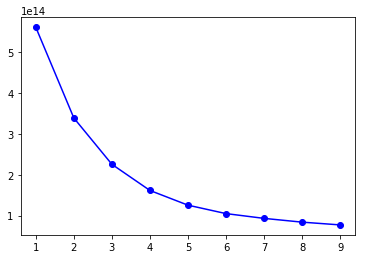

In [151]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [0]:
cluster  = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data['cluster'] = cluster.fit_predict(cluster_data)

In [0]:
# Cluster centers
centroids = cluster.cluster_centers_

In [0]:
# Within cluster sum of squares
wcss = km.inertia_

In [158]:
centroids

array([[6.99984339e+00, 2.96811206e+00, 3.48078920e+00, 4.78734868e+00,
        1.15504051e+03, 7.35594925e+00, 1.28251749e+03, 2.61946980e+02,
        4.01159526e+01, 1.63493898e+03, 3.21951940e+03, 1.00000000e+00,
        1.00000000e+00, 1.00712987e+00, 2.77301404e+02, 3.32621101e+03],
       [6.99620380e+00, 1.10349650e+00, 3.56863137e+00, 4.28551449e+00,
        1.09036623e+03, 5.86713287e+00, 3.52097236e+04, 6.15178896e+03,
        2.74480419e+03, 6.14195201e+04, 1.05525837e+05, 1.00000000e+00,
        1.00000000e+00, 1.04095904e+00, 7.71002431e+03, 1.11219593e+05],
       [6.94400000e+00, 7.94000000e-01, 3.59200000e+00, 4.01400000e+00,
        1.04295600e+03, 6.58000000e+00, 8.78912278e+04, 1.92031019e+04,
        5.60800598e+03, 1.88916736e+05, 3.01619072e+05, 1.00000000e+00,
        1.00000000e+00, 1.07000000e+00, 1.91438233e+04, 3.63015546e+05],
       [6.99820544e+00, 1.69259408e+00, 3.53330655e+00, 4.37487612e+00,
        1.12805839e+03, 5.76059997e+00, 1.18054646e+04, 2.064

In [159]:
wcss

77120441811116.1

In [165]:
for col in cluster_data[cluster_data['cluster']==0].columns:
  print(cluster_data[col].mode())

0    7
dtype: int64
0    4
dtype: int64
0    4
dtype: int64
0    6
dtype: int64
0    368
dtype: int64
0    9
dtype: int64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1
dtype: int64
0    1
dtype: int64
0    1
dtype: int64
0    1.0
dtype: float64
0    0.0
dtype: float64
0    0
dtype: int32
